In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import nltk
import sys
import os
import re

# Download corpus from NLTK
nltk.download()
# Set matplotlib inline
%matplotlib inline

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
# Define path to CSV file
path = 'data/styles.csv'
# Load data from CSV file
ds = pd.read_csv(path, sep=',', on_bad_lines='warn')
ds.describe(include='all')

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
count,44424.000000,44424,44424,44424,44424,44409,44403,44423.000000,44107,44417
unique,NaN,5,7,45,143,46,4,NaN,8,31121
top,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,NaN,Casual,Lucera Women Silver Earrings
freq,NaN,22147,21397,15402,7067,9728,21472,NaN,34406,82
mean,29696.334301,NaN,NaN,NaN,NaN,NaN,NaN,2012.806497,NaN,NaN
std,17049.490518,NaN,NaN,NaN,NaN,NaN,NaN,2.126480,NaN,NaN
min,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN
25%,14768.750000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,28618.500000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
75%,44683.250000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN


In [3]:
# Define tags column
tags = ds.productDisplayName.astype(str)
# Make words lowercase
tags = tags.str.lower()
# Define punctuation
punctuation = set(string.punctuation)
# Remove punctuation
tags = tags.apply(lambda s: ''.join([c for c in s if c not in punctuation]))
# Tokenize words
tags = tags.apply(lambda s: nltk.word_tokenize(s))
# Define stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
# Remove stop words
tags = tags.apply(lambda s: [w for w in s if w not in stop_words])
# Remove numbers
tags = tags.apply(lambda s: [w for w in s if bool(re.search(r'\d', w)) != True])
tags.head()

0              [turtle, check, men, navy, blue, shirt]
1            [peter, england, men, party, blue, jeans]
2                        [titan, women, silver, watch]
3    [manchester, united, men, solid, black, track,...
4                            [puma, men, grey, tshirt]
Name: productDisplayName, dtype: object

In [4]:
# Retrieve words
words = pd.Series([w for s in tags.tolist() for w in s])
# Count word occurrences
count = words.value_counts()
count.describe()

count     6908.000000
mean        35.420093
std        371.906980
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max      19153.000000
dtype: float64

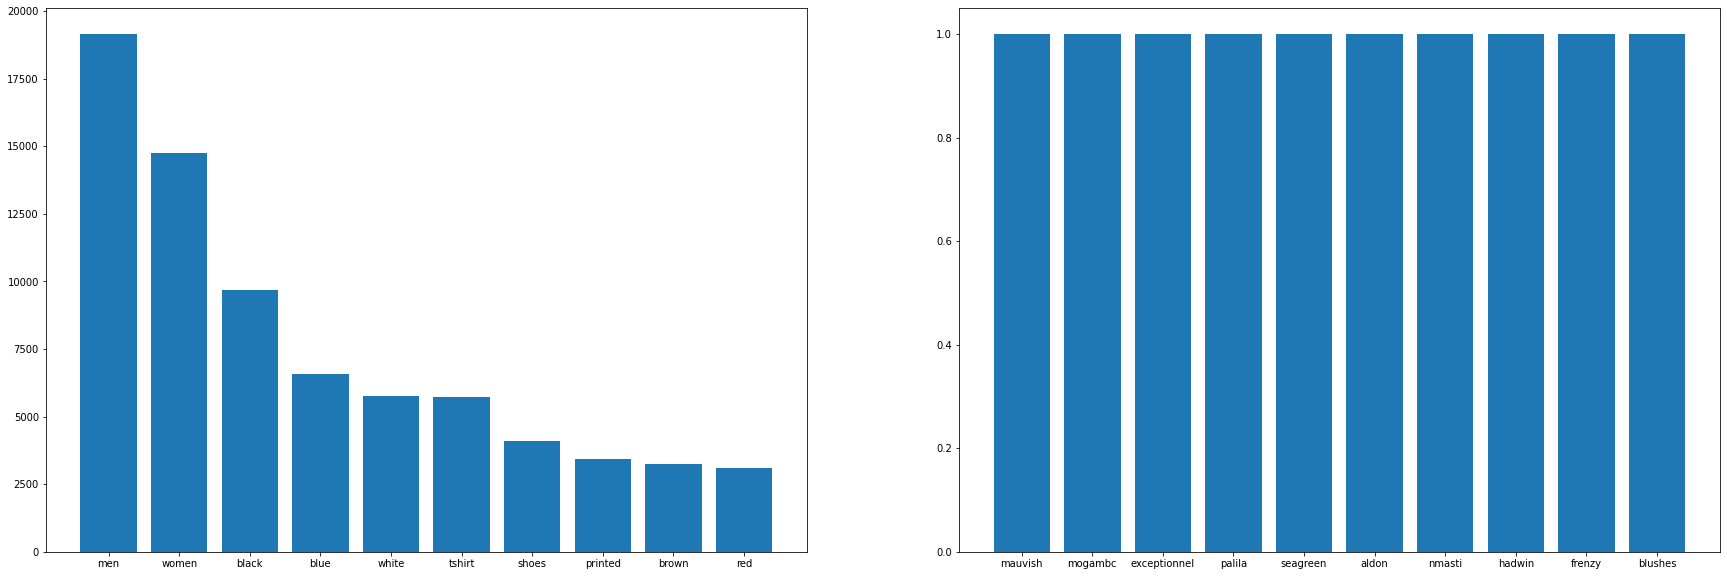

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10))
_ = axs[0].bar(count[:10].index, count[:10].values)
_ = axs[1].bar(count[-10:].index, count[-10:].values)
_ = plt.show()

In [11]:
# Define a vocabulary of words
# NOTE Words with less than two appearences are excluded
vocabulary = pd.Series(list({w for w in words.values if count[w] > 3}))
vocabulary.describe()

count       2453
unique      2453
top       unisex
freq           1
dtype: object

In [12]:
# # One-hot-encode vocabulary
# encoded = pd.get_dummies(vocabulary)
# encoded.head()

In [15]:
# Swap index and value
vocabulary = pd.Series(dict((w, i) for i, w in vocabulary.iteritems()))
# Store vocabulary
vocabulary.to_json('data/vocabulary.json')
vocabulary.head()

unisex         0
remover        1
jdel           2
benetton       3
brightening    4
dtype: int64